# Project Description

This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

## Table of Contents


• Data checking  
• Data exploration by visualization  

# Importing Required Libraries and Getting the Data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
data_path = './Data/StudentsPerformance.csv'
df = pd.read_csv(data_path)

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [19]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [85]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

# Data Information

Students Performance in Exams dataset has the following columns.   

• gender: sex of students - ['female', 'male']  

• race/ethnicity: race or ethnicity of the students, which could be categorized into following groups - ['group B', 'group C', 'group A', 'group D', 'group E']  

• parental level of education: educational level of the parents, one from the followings - ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'] 

• lunch: having lunch before test ['standard', 'free/reduced']  

• test preparation course: whether or not the students have completed a test preparation course before exams - ['none', 'completed']  

• math score: numerical scores representing the performance of the students in a math exam.  

• reading score: numerical scores representing the performance of the students in a reading exam.  

• writing score: numerical scores representing the performance of the students in a writing exam.

## Data Checking

In [20]:
print('Null values count in each column\n\n',df.isna().sum())

Nan values count in each column

 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [21]:
print('Duplicate rows count:', df.duplicated().sum())

Duplicate rows count: 0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights

- data is clean (there are no null values and duplicate rows)  
- numerical columns exhibit similar statistics such as mean, standard deviation, and other mathematical descriptors

For further exploration, a new column will be added to describe the average score per student based on the math, reading, and writing scores.

In [24]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# Data Exploration by visualization

Let's delve deeper into the data and examine the impact of various columns on students' performance in exams.

In [26]:
female = df[df['gender'] == 'female']['average score']
male = df[df['gender'] == 'male']['average score']
fig = ff.create_distplot([df['average score'], female, male], ['both','female', 'male'], colors=['slategray','magenta','rgb(0, 0, 100)'], bin_size=3)
fig.show()

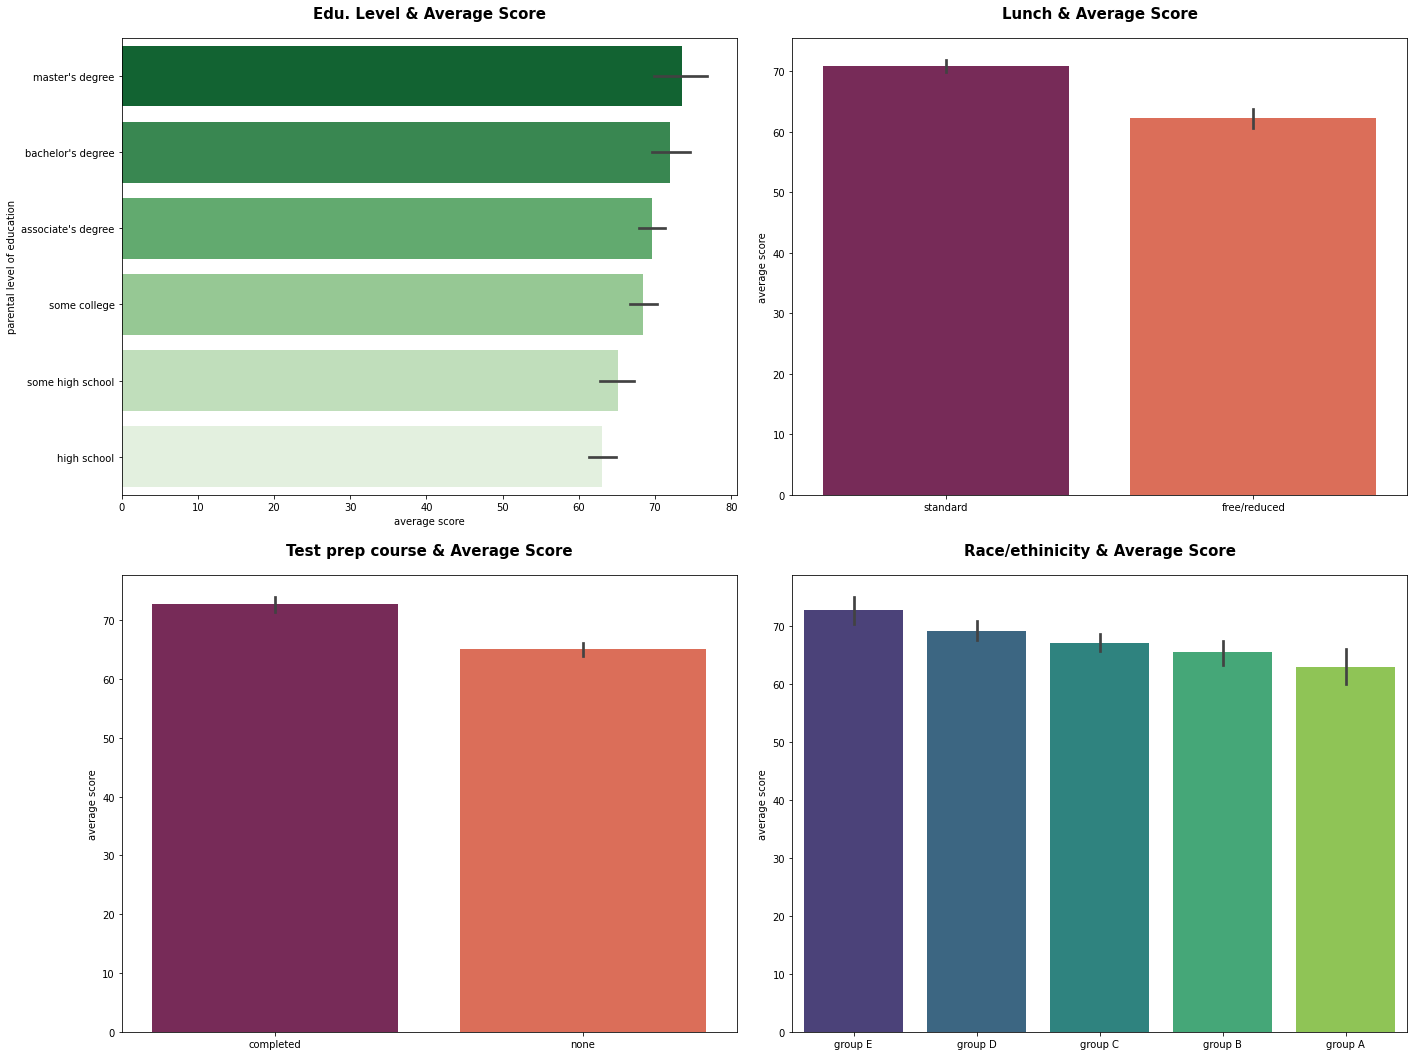

In [27]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
plt.subplot(221)
plt.title(label='Edu. Level & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, y='parental level of education', x='average score', palette='Greens_r', order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])



plt.subplot(222)
plt.title(label='Lunch & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='lunch', y='average score', palette='rocket')
plt.xlabel('')

plt.subplot(223)
plt.title(label='Test prep course & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='test preparation course', y='average score', palette='rocket', order=['completed','none'])
plt.xlabel('')

plt.subplot(224)
plt.title(label='Race/ethinicity & Average Score',fontsize=15,fontweight='bold',y=1.03)
sns.barplot(data=df, x='race/ethnicity', y='average score', palette='viridis', order=['group E','group D','group C', 'group B','group A'])
plt.xlabel('')


fig.tight_layout(pad=2)
plt.show()

In [28]:
grouped_gender = df.groupby('gender').mean()
grouped_gender

,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


## Insights  

- Parental level of education has bad effects at lower levels  
- Standard lunch helps perform well in exams.  
- Test Prepration helps in scoring. 
- Race/ethnicity has an impact on students average performance.  
 


In [37]:
x_labels = [col.split()[0] for col in grouped_gender.columns]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x_labels,
    y=grouped_gender.loc['female'],
    name='Female',
    marker_color='Magenta'
))
fig.add_trace(go.Bar(
    x=x_labels,
    y=grouped_gender.loc['male'],
    name='Male',
    marker_color='Navy'
))

fig.update_layout(title={
        'text': "Scores of both genders compared",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

In [40]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, subplot_titles=("Math score", "Reading score", "Writing score"))

colors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600'] 

enthnicity_groups = df.groupby('race/ethnicity').mean()

fig.add_trace(go.Bar(x=df['race/ethnicity'].unique(), y=enthnicity_groups['math score'], marker=dict(color=colors)), 1, 1)

fig.add_trace(go.Bar(x=df['race/ethnicity'].unique(), y=enthnicity_groups['reading score'], marker=dict(color=colors)), 1, 2)

fig.add_trace(go.Bar(x=df['race/ethnicity'].unique(), y=enthnicity_groups['writing score'], marker=dict(color=colors)),1, 3)


fig.update_xaxes(title_text="race/ethnicity", row=1, col=1)
fig.update_xaxes(title_text="race/ethnicity", row=1, col=2)
fig.update_xaxes(title_text="race/ethnicity", row=1, col=3)
fig.update_layout(height=500, width=1000,coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

Insights

- Group E students have scored the highest marks.  
- Group A students have scored the lowest marks.  

In [41]:
fig = make_subplots(
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=['Gender', 'Race/enthnicity', 'Lunch', 'Test course', 'Parental education'],
    rows=2, cols=3)

fig.add_trace(go.Pie(values=df['gender'].value_counts().values,
                     labels=df['gender'].value_counts().keys(),
                     pull=[0.05, 0]), row=1, col=1)

fig.add_trace(go.Pie(values=df['race/ethnicity'].value_counts().values,
                     labels=df['race/ethnicity'].value_counts().keys(), marker=dict(colors=colors),
                     pull=[0.05, 0.05, 0.05, 0.05, 0.05]), row=1, col=2)
    
fig.add_trace(go.Pie(values=df['lunch'].value_counts().values,
                     labels=df['lunch'].value_counts().keys(),
                     pull=[0.05, 0]),row=1, col=3)

fig.add_trace(go.Pie(values=df['test preparation course'].value_counts().values,
                     labels=df['test preparation course'].value_counts().keys(),
                     pull=[0.05, 0]), row=2, col=1)

fig.add_trace(go.Pie(values=df['parental level of education'].value_counts().values,
                     labels=df['parental level of education'].value_counts().keys(),
                     pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]), row=2, col=2)

fig.update_layout(height=600, width=800, showlegend=False)

fig.show()

## Key Insights

- Gender distribution among students is approximately equal.
- The majority of students belong to group C in the "race/ethnicity" column.
- A significant majority of students had standard lunch.
- Most students did not enroll in any test preparation course.
- The highest number of students have parents with "Some College" education, followed closely by "Associate's Degree".